## Goal: Analyze the correlations between the factors we have created and the anisotropy matrix generated from the polarized spectra 

In [441]:
import os
import pickle

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pathlib import Path

# Standardizing Plots
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 25
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['legend.fontsize'] = 15
plt.rcParams['legend.loc'] = 'upper left'
plt.rcParams['legend.fancybox'] = True
plt.rcParams['figure.figsize'] = (10, 6)

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Times New Roman'

### Data Exploration

Factor Dictionaries 

In [442]:
#Read in file and turn it into a dataframe
factor_dict_dir_path = Path("Cr_data/Cr_FD_CNN_r^4")
os.listdir(factor_dict_dir_path)

['mp-1007974_factor_dict.json',
 'mp-1008280_factor_dict.json',
 'mp-1009079_factor_dict.json',
 'mp-1009485_factor_dict.json',
 'mp-1009592_factor_dict.json',
 'mp-1010071_factor_dict.json',
 'mp-1014993_factor_dict.json',
 'mp-1014995_factor_dict.json',
 'mp-1016059_factor_dict.json',
 'mp-1016225_factor_dict.json',
 'mp-1016300_factor_dict.json',
 'mp-1016625_factor_dict.json',
 'mp-1016653_factor_dict.json',
 'mp-1016677_factor_dict.json',
 'mp-1017080_factor_dict.json',
 'mp-1017099_factor_dict.json',
 'mp-1017197_factor_dict.json',
 'mp-1017317_factor_dict.json',
 'mp-1018066_factor_dict.json',
 'mp-1018079_factor_dict.json',
 'mp-1018082_factor_dict.json',
 'mp-1018161_factor_dict.json',
 'mp-1021275_factor_dict.json',
 'mp-1021301_factor_dict.json',
 'mp-1021379_factor_dict.json',
 'mp-1021695_factor_dict.json',
 'mp-1022627_factor_dict.json',
 'mp-1022971_factor_dict.json',
 'mp-1023158_factor_dict.json',
 'mp-1023188_factor_dict.json',
 'mp-1023490_factor_dict.json',
 'mp-102

Anisotropy Matricies 

In [443]:
#Read in file and turn it into a dataframe
#old_anisotropy_matrix_path = Path("Cr_data/anisotropy_data_14NOV24.txt")
#anisotropy_matrix_df = pd.read_csv(old_anisotropy_matrix_path)
anisotropy_matrix_path = Path("Cr_data/12JAN2025anisotropy_data.csv")
anisotropy_matrix_df = pd.read_csv(anisotropy_matrix_path, sep='\t')
anisotropy_matrix_df.set_index(anisotropy_matrix_df.columns[0], inplace=True)
anisotropy_matrix_df = anisotropy_matrix_df.loc[anisotropy_matrix_df.index.str.contains("_Cr")] #Get only entries with Cr as center atom
anisotropy_matrix_df.index = [name.split('_')[0] for name in anisotropy_matrix_df.index]

anisotropy_matrix_df.index.name = 'Material'

print(anisotropy_matrix_df.head())

            m00       m01       m02       m10  m11       m12       m20  \
Material                                                                 
mp-1007974  0.0  0.243915  0.000003  0.243915  0.0  0.243914  0.000003   
mp-1008280  0.0  0.245998  0.000259  0.245998  0.0  0.246171  0.000259   
mp-1009079  0.0  0.402546  0.000005  0.402546  0.0  0.402545  0.000005   
mp-1009485  0.0  0.263544  0.000004  0.263544  0.0  0.263543  0.000004   
mp-1009592  0.0  0.355339  0.000005  0.355339  0.0  0.355338  0.000005   

                 m21  m22  
Material                   
mp-1007974  0.243914  0.0  
mp-1008280  0.246171  0.0  
mp-1009079  0.402545  0.0  
mp-1009485  0.263543  0.0  
mp-1009592  0.355338  0.0  


Explore Anisotropy Matrix data

In [444]:
num_rows_ani_mat = anisotropy_matrix_df.shape[0]
print(num_rows_ani_mat)


758


Explore Factor Dictionary Data

In [445]:
import json

# Load the JSON file
with open(factor_dict_dir_path / 'mp-374_factor_dict.json', 'r') as file:
    mp_374 = json.load(file)

# Print the keys
print(mp_374.keys())

# Iterate through the dictionary and print each key and value
for key, val in mp_374.items():
    print(key, val)

dict_keys(['MP-ID', 'Material', 'steinhart_vector', 'steinhart_parameter_sum', 'band_gap', 'oxidation_state', 'possible_species', 'density', 'quadrupole moment', 'quadrupole moment normalized'])
MP-ID mp-374
Material CrB2
steinhart_vector [[0.007347790896819496, 4.529486368280871e-19, 0.001180921851964223, 3.9676489867723356e-19, 0.003144495452256352, 1.1248444503914572e-18, 0.0008664202684271073, 1.625926562520386e-18, 0.004030425620377516, 2.4007387888270495e-18, 0.003446100677024839], 'CrB2']
steinhart_parameter_sum 0.020016154766869538
band_gap 0.0
oxidation_state 4.0
possible_species ['B2-', 'Cr4+']
density 5.3164020273198265
quadrupole moment [[-35.02955039052665, 4.909388746643373e-06, -3.552713678800501e-15], [4.909388746643373e-06, -35.02954472165098, -5.329070518200751e-15], [-3.552713678800501e-15, -5.329070518200751e-15, -55.15345056384599]]
quadrupole moment normalized [[-0.25738979982611726, 1.5889458280377022e-08, 4.163336342344337e-17], [1.5889458280377022e-08, -0.25738

#### Material Dictionary Formatting

In [446]:
data_list = []

for file_path in factor_dict_dir_path.glob('*.json'):
    with open(file_path, 'rb') as file:
        material_dict = json.load(file)

        # Extract individual values, keeping only numerical stuff
        material = material_dict['MP-ID']
        # steinhart_vector = material_dict['Steinhart Vector'][0]  # Just the vector, ignoring the material name
        steinhart_vector = material_dict['steinhart_vector'][0]  # Just the vector, ignoring the material name
        # steinhart_param_sum = material_dict['Steinhart Parameter Sum']
        steinhart_param_sum = material_dict['steinhart_parameter_sum']
        #minkowski_structure_vector = material_dict['minkowski structure vector']
        band_gap = material_dict['band_gap']
        oxidation_state = material_dict['oxidation_state']
        possible_species = len(material_dict['possible_species'])
        density = material_dict['density']
        quadrupole_moment = np.array(material_dict['quadrupole moment']).flatten()  # Flatten matrix to vector
        quadrupole_moment_norm = np.array(material_dict['quadrupole moment normalized']).flatten()

        # Combine all the features into a single row (list)
        data_row = [
            material,
            *steinhart_vector,  # Unpack vector values
            steinhart_param_sum,
            #*minkowski_structure_vector,# Unpack vector values
            band_gap,
            oxidation_state,
            possible_species,
            density,
            *quadrupole_moment,  # Unpack matrix values
            *quadrupole_moment_norm  # Unpack normalized matrix values
        ]
        
        data_list.append(data_row)

# Define the column names
columns = ['Material'] + [f"ST {i}" for i in range(11)] # Steinhart vector values from 0 to 10
#columns += [f"MSM {i}" for i in range(11)]
columns += ['Steinhart Parameter Sum', 'band_gap', 'oxidation_state', 'possible_species', 'density']
columns += [f'QM {i}' for i in range(9)] # Flattened quadrupole matrix
columns += [f'QM Norm {i}' for i in range(9)] # Flattened quadrupole matrix (normalized)

print(columns)

factor_df = pd.DataFrame(data_list, columns=columns)
factor_df.set_index('Material', inplace=True)

print(factor_df)

['Material', 'ST 0', 'ST 1', 'ST 2', 'ST 3', 'ST 4', 'ST 5', 'ST 6', 'ST 7', 'ST 8', 'ST 9', 'ST 10', 'Steinhart Parameter Sum', 'band_gap', 'oxidation_state', 'possible_species', 'density', 'QM 0', 'QM 1', 'QM 2', 'QM 3', 'QM 4', 'QM 5', 'QM 6', 'QM 7', 'QM 8', 'QM Norm 0', 'QM Norm 1', 'QM Norm 2', 'QM Norm 3', 'QM Norm 4', 'QM Norm 5', 'QM Norm 6', 'QM Norm 7', 'QM Norm 8']
                ST 0          ST 1          ST 2          ST 3      ST 4  \
Material                                                                   
mp-1007974  0.000905  2.357219e-20  1.484965e-19  5.545020e-20  0.000173   
mp-1008280  0.000943  4.753875e-20  1.938541e-07  8.041502e-20  0.000180   
mp-1009079  0.000287  8.007076e-21  2.809617e-20  4.184094e-20  0.000219   
mp-1009485  0.006283  7.706785e-19  1.108523e-18  1.284245e-18  0.003199   
mp-1009592  0.000526  5.512685e-20  7.569546e-20  2.759073e-04  0.000069   
...              ...           ...           ...           ...       ...   
mp-972130   

In [447]:
#Look at number of materials 
num_rows_factor = factor_df.shape[0]
print(num_rows_factor)


print(factor_df.columns)

801
Index(['ST 0', 'ST 1', 'ST 2', 'ST 3', 'ST 4', 'ST 5', 'ST 6', 'ST 7', 'ST 8',
       'ST 9', 'ST 10', 'Steinhart Parameter Sum', 'band_gap',
       'oxidation_state', 'possible_species', 'density', 'QM 0', 'QM 1',
       'QM 2', 'QM 3', 'QM 4', 'QM 5', 'QM 6', 'QM 7', 'QM 8', 'QM Norm 0',
       'QM Norm 1', 'QM Norm 2', 'QM Norm 3', 'QM Norm 4', 'QM Norm 5',
       'QM Norm 6', 'QM Norm 7', 'QM Norm 8'],
      dtype='object')


Clean data make sure there is a 1 to 1 correspondence between factor dictionary and anisotropy matrix

In [448]:
def filter_matching_mpids(df1, df2):
    # Find common MP-IDs in both DataFrames
    common_mp_ids = df1.index.intersection(df2.index)
    
    # Filter both DataFrames to keep only the rows with matching MP-IDs
    filtered_df1 = df1.loc[common_mp_ids]
    filtered_df2 = df2.loc[common_mp_ids]
    
    return filtered_df1, filtered_df2

# Example usage
factor_df, anisotropy_matrix_df = filter_matching_mpids(factor_df, anisotropy_matrix_df)

print(f'Factor {factor_df.shape[0]}, Ani {anisotropy_matrix_df.shape[0]}')


Factor 750, Ani 750


Get rid of Nan entries in Factor df and Anisotropy Matrix df


In [449]:
def remove_nan_entries(factor_df, anisotropy_df):
    # Drop rows with NaN values from the factor DataFrame
    cleaned_factor_df = factor_df.dropna()
    
    # Extract the MP-IDs of the valid rows
    valid_mp_ids = cleaned_factor_df.index
    
    # Filter the anisotropy DataFrame to keep only rows matching the valid MP-IDs
    cleaned_anisotropy_df = anisotropy_df.loc[anisotropy_df.index.isin(valid_mp_ids)]
    
    return cleaned_factor_df, cleaned_anisotropy_df

factor_df, anisotropy_matrix_df = remove_nan_entries(factor_df, anisotropy_matrix_df)



Sum of diagonal elements of the anisotropy matrix divded by largest value to use as output

In [450]:
# 1) Identify the off-diagonal columns
off_diagonal_cols = ["m01", "m02", "m10"]

# 2) Sum the off-diagonal entries (row-wise)
anisotropy_matrix_df["off_diagonal_sum"] = anisotropy_matrix_df[off_diagonal_cols].sum(axis=1)

# 3) Determine the largest off-diagonal entry in each row
#anisotropy_matrix_df["largest_off_diagonal"] = anisotropy_matrix_df[off_diagonal_cols].max(axis=1)
largest_off_diagonal = max(anisotropy_matrix_df["off_diagonal_sum"])
print(largest_off_diagonal)

# 4) Compute the ratio
#    (handle any potential zero-division issues if needed)
anisotropy_matrix_df["normed_sum"] = anisotropy_matrix_df["off_diagonal_sum"] / largest_off_diagonal

#Check
print(anisotropy_matrix_df)

1.8794355568467878
            m00       m01       m02       m10  m11       m12       m20  \
Material                                                                 
mp-1009079  0.0  0.402546  0.000005  0.402546  0.0  0.402545  0.000005   
mp-1009485  0.0  0.263544  0.000004  0.263544  0.0  0.263543  0.000004   
mp-1014993  0.0  0.393172  0.000006  0.393172  0.0  0.393171  0.000006   
mp-1014995  0.0  0.255122  0.054114  0.255122  0.0  0.229704  0.054114   
mp-1016059  0.0  0.262372  0.147686  0.262372  0.0  0.271329  0.147686   
...         ...       ...       ...       ...  ...       ...       ...   
mp-850902   0.0  0.342876  0.074148  0.342876  0.0  0.377459  0.074148   
mp-861904   0.0  0.499712  0.098455  0.499712  0.0  0.543816  0.098455   
mp-9630     0.0  0.445527  0.135579  0.445527  0.0  0.453456  0.135579   
mp-9916     0.0  0.309083  0.083206  0.309083  0.0  0.336380  0.083206   
mp-998397   0.0  0.398591  0.006497  0.398591  0.0  0.401394  0.006497   

                 m

Check to make sure data is ready

In [451]:
print("factor_df")
print(factor_df.head(5))
print(factor_df.tail(5))
print("anisotropy_matrix_df")
print(anisotropy_matrix_df.head(5))
print(anisotropy_matrix_df.tail(5))
print(factor_df.shape[0])
print(anisotropy_matrix_df.shape[0])

factor_df
                ST 0          ST 1          ST 2          ST 3      ST 4  \
Material                                                                   
mp-1009079  0.000287  8.007076e-21  2.809617e-20  4.184094e-20  0.000219   
mp-1009485  0.006283  7.706785e-19  1.108523e-18  1.284245e-18  0.003199   
mp-1014993  0.007883  1.624733e-18  2.850902e-04  3.693174e-18  0.006004   
mp-1014995  0.016017  3.964602e-04  4.277067e-04  1.191073e-02  0.008161   
mp-1016059  0.015883  7.379969e-04  4.941686e-04  1.177364e-02  0.008125   

                    ST 5      ST 6          ST 7      ST 8          ST 9  ...  \
Material                                                                  ...   
mp-1009079  5.799166e-20  0.000102  9.343343e-20  0.000206  1.171408e-19  ...   
mp-1009485  2.673919e-18  0.003949  3.270607e-18  0.001337  3.284673e-18  ...   
mp-1014993  3.035127e-18  0.002850  5.738401e-18  0.005614  5.072970e-18  ...   
mp-1014995  1.103148e-03  0.010011  9.748510e-03  0.

## Analyze correlations using neural network machine learning model


# Set up training and testing 

Let X be the factor ditionary and y be the sum of the off diagonal components of the anisotropy matrix

### Select which X data we want to use

Maybe we could try finding which factors correlate the most using inear model then use those in the neural net

In [452]:
#X = factor_df
#X = factor_df[[f'QM {i}' for i in range(9)]]
#X = factor_df[['QM 1', 'QM 2', 'QM 5']]
#X = factor_df[['QM 0', 'QM 4', 'QM 8']]
#X = factor_df[[f'QM Norm {i}' for i in range(9)]]
X = factor_df[[f'ST {i}' for i in range(9)] + [f'QM Norm {i}' for i in range(9)] + ['band_gap', 'oxidation_state','density']]
#X = factor_df[[f'ST {i}' for i in [0, 7]]]
#X = factor_df[[f'ST {i}' for i in [1, 2]]]
#X = factor_df[['Steinhart Parameter Sum', 'band_gap', 'oxidation_state', 'possible_species', 'density']]
#X = factor_df[['ST 0', 'possible_species']]
#X = factor_df[['ST 2', 'band_gap', 'oxidation_state', 'density', 'QM Norm 2', "QM Norm 5", "QM Norm 6" ]]

In [453]:
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, anisotropy_matrix_df['normed_sum'], test_size=0.2)

In [454]:
print(X_train.head())
print(X_train.dtypes)


                ST 0          ST 1          ST 2          ST 3      ST 4  \
Material                                                                   
mp-755234   0.007226  2.458036e-04  7.152248e-04  1.719851e-04  0.005419   
mp-1018161  0.000490  9.765351e-20  9.067974e-20  2.496108e-04  0.000052   
mp-26571    0.007843  4.613505e-04  4.133660e-04  9.382580e-04  0.005828   
mp-774255   0.005091  2.769506e-04  1.168189e-03  1.188540e-03  0.003518   
mp-755220   0.008344  6.362813e-19  7.398298e-04  1.834302e-18  0.006283   

                    ST 5      ST 6          ST 7      ST 8  QM Norm 0  ...  \
Material                                                               ...   
mp-755234   2.888971e-04  0.002900  1.977684e-04  0.004932  -0.118255  ...   
mp-1018161  1.001020e-19  0.000265  2.049355e-04  0.000183  -0.006219  ...   
mp-26571    1.227844e-03  0.002726  1.698999e-03  0.005110  -0.125692  ...   
mp-774255   1.126443e-03  0.001958  1.794832e-03  0.003002  -0.122482  ...   

In [455]:
y_train.head()

Material
mp-755234     0.628547
mp-1018161    0.360352
mp-26571      0.468914
mp-774255     0.625018
mp-755220     0.606970
Name: normed_sum, dtype: float64

### Visualize the training data

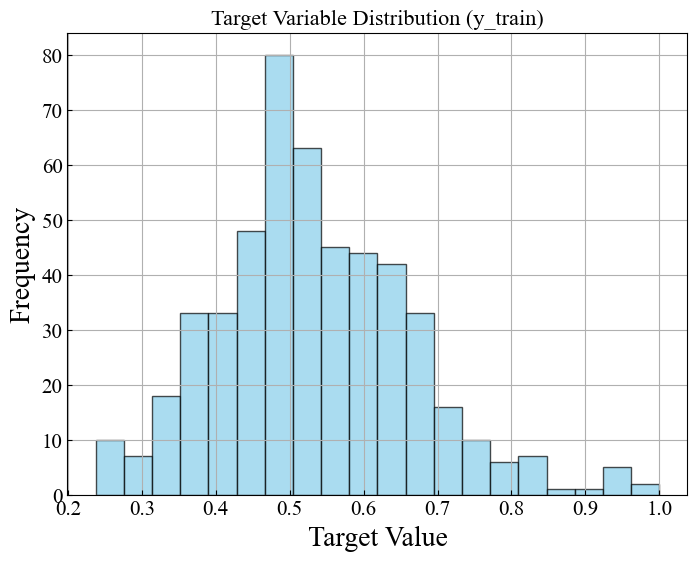

In [456]:
plt.figure(figsize=(8, 6))
plt.hist(y_train, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title("Target Variable Distribution (y_train)", fontsize=16)
plt.xlabel("Target Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


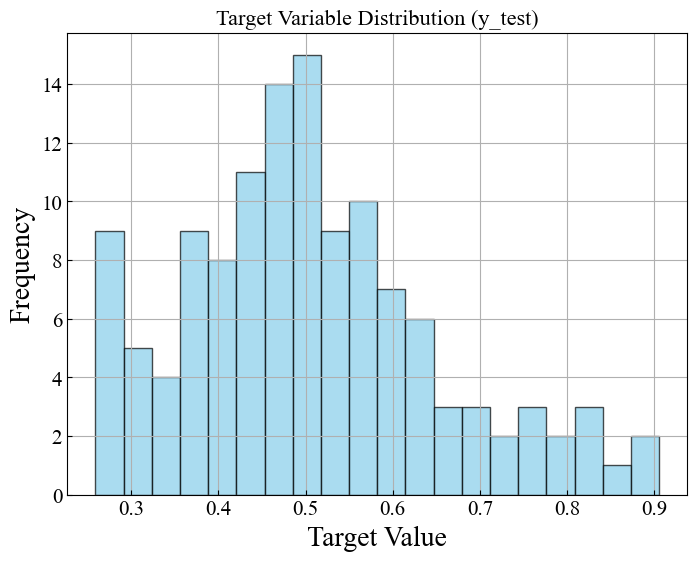

In [457]:
plt.figure(figsize=(8, 6))
plt.hist(y_test, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title("Target Variable Distribution (y_test)", fontsize=16)
plt.xlabel("Target Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Import Dependencies

In [458]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, Add, Input, LeakyReLU
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.18.0


# Build, Compile, Train and Evaluate Model

In [459]:
#Custom metric noramlization by range
def normalized_mean_absolute_error(y_true, y_pred):
    # Compute the absolute error
    mae = tf.reduce_mean(tf.abs(y_true - y_pred))
    # Compute the range of the true values
    range_val = tf.reduce_max(y_true) - tf.reduce_min(y_true)
    # Normalize MAE by the range
    return mae / (range_val + tf.keras.backend.epsilon()) #Small constant added to avoid division by zero

def weighted_mse(y_true, y_pred):
    weight = tf.where(y_true < 1.5, 2.0, tf.where(y_true > 2.5, 1.5, 1.0))
    return tf.reduce_mean(weight * tf.square(y_true - y_pred))

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(64),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.2),
    Dense(32, activation='elu'),
    Dense(1)
])





model.compile(
    optimizer='adam',
    loss= 'mse',          # Mean Squared Error for regression
    metrics=['mae', normalized_mean_absolute_error]      # Track Mean Absolute Error as well
)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)]
)

# Evaluate on the test set
loss, mae, nmae = model.evaluate(X_test, y_test, verbose=0)
print("Test MSE =", loss)
print("Test MAE =", mae)
print("Test NMAE =", nmae)



Epoch 1/100


c:\Users\John\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\John\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 1.2734 - mae: 0.8697 - normalized_mean_absolute_error: 1.7756 - val_loss: 0.1358 - val_mae: 0.3407 - val_normalized_mean_absolute_error: 0.8886 - learning_rate: 0.0010
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.5812 - mae: 0.5611 - normalized_mean_absolute_error: 1.1019 - val_loss: 0.1013 - val_mae: 0.2913 - val_normalized_mean_absolute_error: 0.7560 - learning_rate: 0.0010
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.3669 - mae: 0.4476 - normalized_mean_absolute_error: 0.7488 - val_loss: 0.1162 - val_mae: 0.3160 - val_normalized_mean_absolute_error: 0.7861 - learning_rate: 0.0010
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.3806 - mae: 0.4539 - normalized_mean_absolute_error: 0.7985 - val_loss: 0.1521 - val_mae: 0.3687 - val_normalized_mean_absolute_error: 0.9718 - learning_rate: 0.0010
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2665 - mae: 0.3491 - normalized_mean_a

### Plotting the difference in prediction and true

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


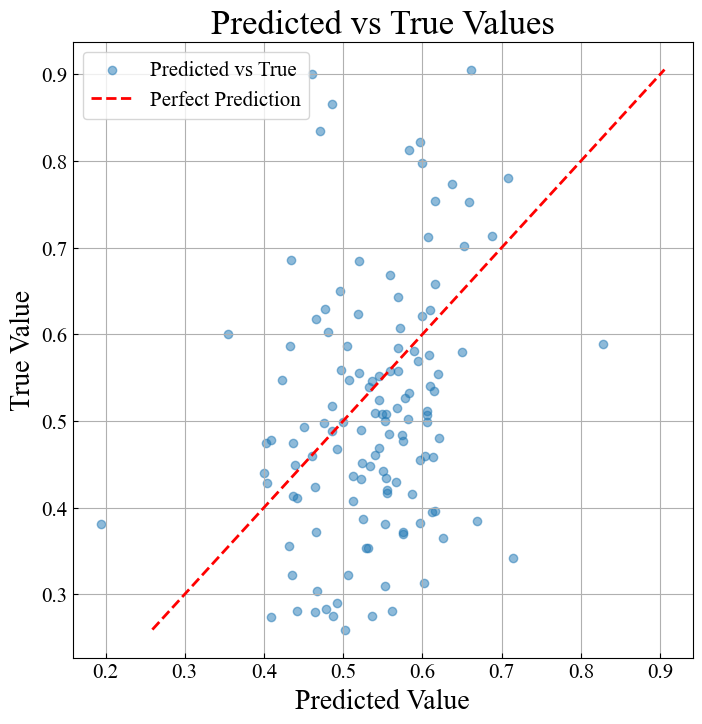

In [460]:
#Get predictions for the test set

y_pred = model.predict(X_test)
y_pred = y_pred.flatten()  # Convert to shape (n_samples,)

# Scatter plot of predicted vs true values
plt.figure(figsize=(8, 8))
plt.scatter(y_pred, y_test, alpha=0.5, label="Predicted vs True")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Perfect Prediction")
plt.xlabel("Predicted Value")
plt.ylabel("True Value")
plt.legend()
plt.grid(True)
plt.title("Predicted vs True Values")
plt.show()


### Plotting Residuals

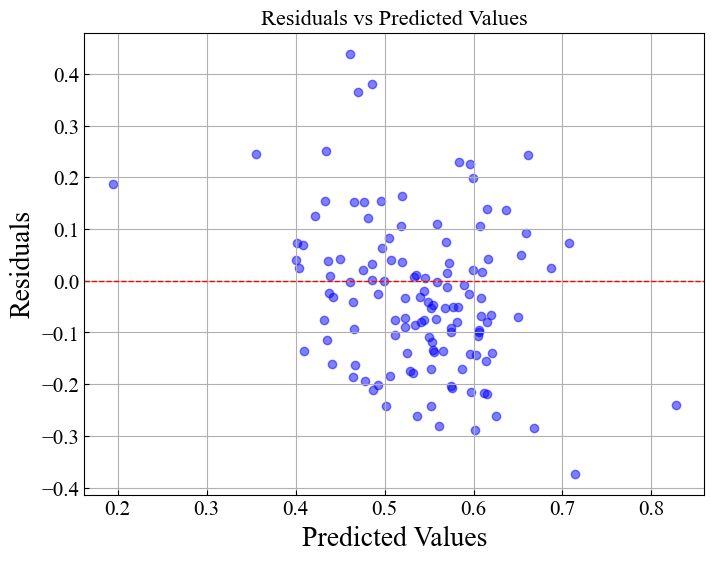

In [461]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5, color='blue')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title("Residuals vs Predicted Values", fontsize=16)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()


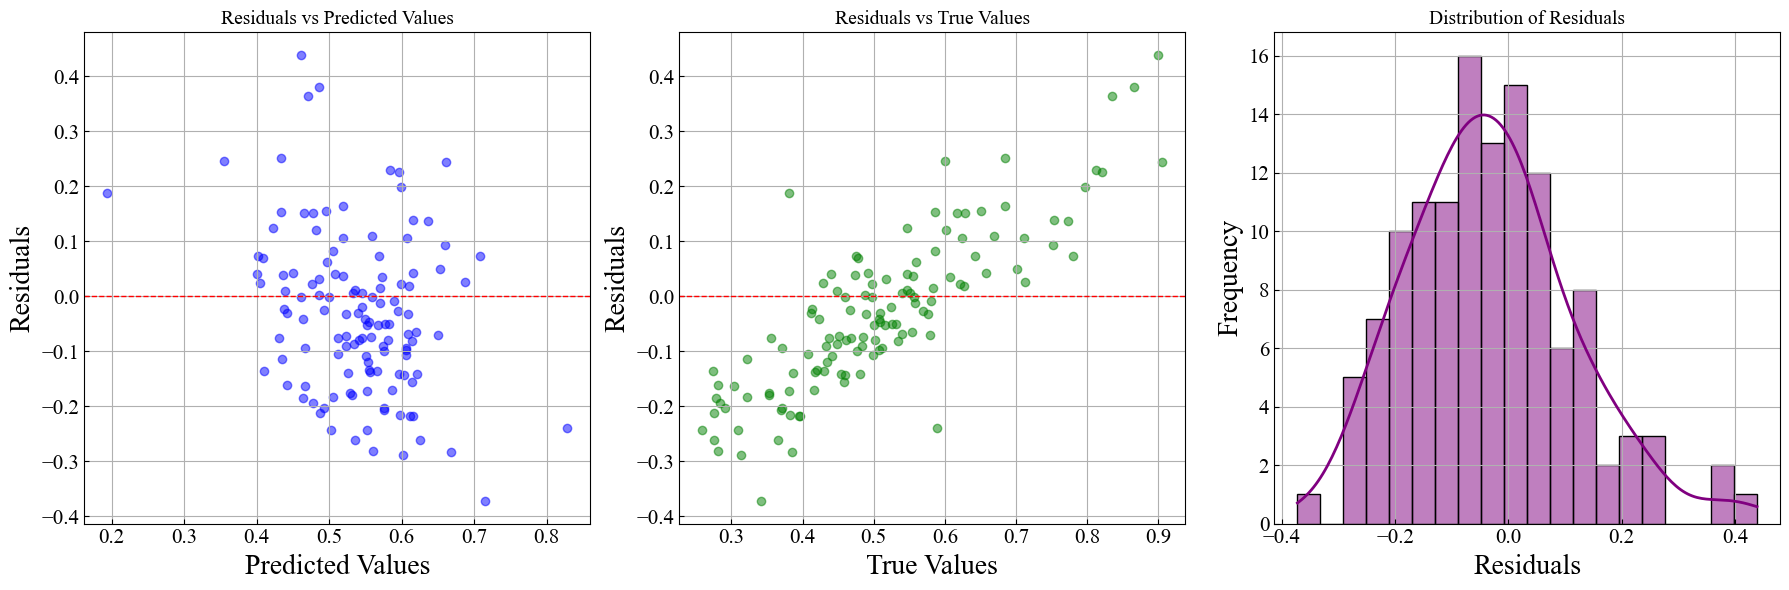

In [462]:
import seaborn as sns

# Calculate residuals
residuals = y_test - y_pred

# Create a figure with 1x3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 1. Residuals vs Predicted Values
axes[0].scatter(y_pred, residuals, alpha=0.5, color='blue')
axes[0].axhline(0, color='red', linestyle='--', linewidth=1)
axes[0].set_title("Residuals vs Predicted Values", fontsize=14)
axes[0].set_xlabel("Predicted Values")
axes[0].set_ylabel("Residuals")
axes[0].grid(True)

# 2. Residuals vs True Values
axes[1].scatter(y_test, residuals, alpha=0.5, color='green')
axes[1].axhline(0, color='red', linestyle='--', linewidth=1)
axes[1].set_title("Residuals vs True Values", fontsize=14)
axes[1].set_xlabel("True Values")
axes[1].set_ylabel("Residuals")
axes[1].grid(True)

# 3. Histogram of Residuals
sns.histplot(residuals, kde=True, color='purple', bins=20, ax=axes[2])
axes[2].set_title("Distribution of Residuals", fontsize=14)
axes[2].set_xlabel("Residuals")
axes[2].set_ylabel("Frequency")
axes[2].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


Learning on normally distributed data